<a href="https://colab.research.google.com/github/alfrepereyra/laboratorio/blob/main/Lab_zonas_peligro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# cargamos el DataFrame original desde el archivo CSV
archivo_csv =  '/content/drive/MyDrive/UPSO/laboratorio_zonas_peligro/Crimenes.csv'

# cargamos el archivo CSV en un dataFrame
df = pd.read_csv(archivo_csv)

df

normalizamos las variables para poder trabajar mejor y utilizo la curva de codo para encontrar el  número óptimo de clusters en el conjunto de datos.

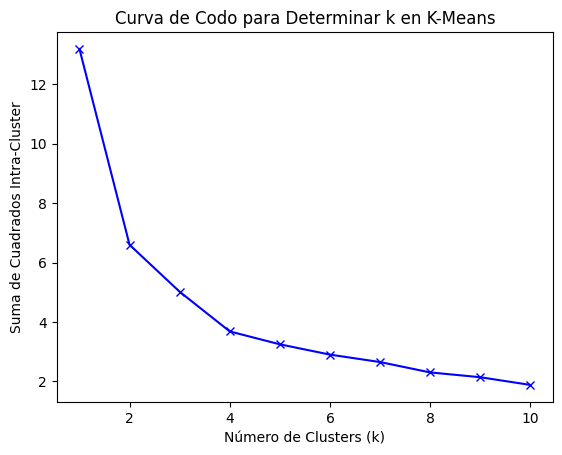

Número óptimo de clusters (k): 3


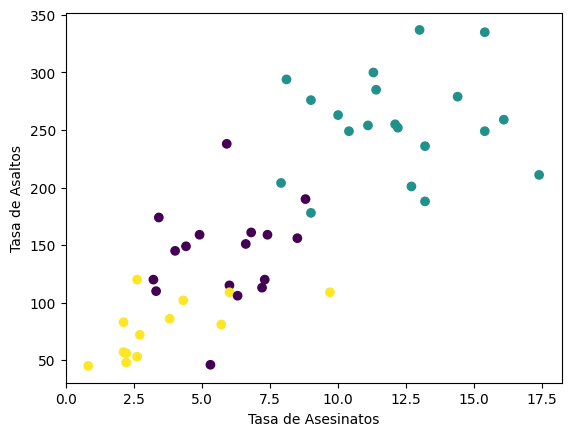

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# cargo el dataFrame original
archivo_csv = '/content/drive/MyDrive/UPSO/laboratorio_zonas_peligro/Crimenes.csv'
datos = pd.read_csv(archivo_csv)

# seleccion de columnas relevantes para el clustering
caracteristicas = datos[['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']]

# Normalizamos las variables
escalador = MinMaxScaler()
caracteristicas_normalizadas = escalador.fit_transform(caracteristicas)

#calculamos la suma de cuadrados intra-cluster para diferentes valores de k
sum_squared_distances = []
valores_k = range(1, 11)

for k in valores_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(caracteristicas_normalizadas)
    sum_squared_distances.append(kmeans.inertia_)

# visualizamos la curva de codo
plt.plot(valores_k, sum_squared_distances, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Suma de Cuadrados Intra-Cluster')
plt.title('Curva de Codo para Determinar k en K-Means')
plt.show()

#  número óptimo de clusters
k_optimo = 3
print(f'Número óptimo de clusters (k): {k_optimo}')

#K-Means con el número óptimo de clusters
kmeans_optimo = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
etiquetas_optimas = kmeans_optimo.fit_predict(caracteristicas_normalizadas)

plt.scatter(caracteristicas['Asesinatos'], caracteristicas['Asaltos'], c=etiquetas_optimas, cmap='viridis')
plt.xlabel('Tasa de Asesinatos')
plt.ylabel('Tasa de Asaltos')
plt.show()


este código crea un boxplot que muestra la distribución de crímenes (normalizados) para cada tipo en todos los estados. La información de todos los estados se combina en un solo gráfico, y ayudar a comparar las distribuciones de crímenes entre diferentes tipos y estados.
Cada caja representa un cuartil de la distribución de los datos, y las líneas dentro de las cajas representan la mediana.

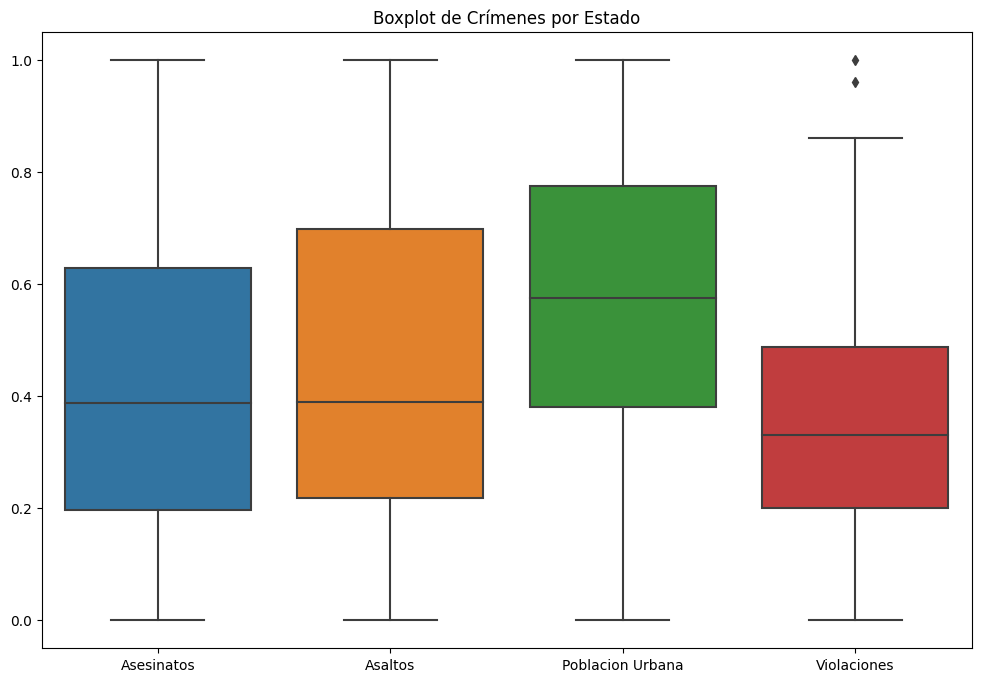

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Cargamos el DataFrame original desde el archivo CSV
archivo_csv = '/content/drive/MyDrive/UPSO/laboratorio_zonas_peligro/Crimenes.csv'

# Cargamos el archivo CSV en un DataFrame
df = pd.read_csv(archivo_csv)

# Seleccionamos las columnas de interés y la columna 'Estado'
columnas_interes = ['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones', 'Estado']
df_seleccionado = df[columnas_interes]

# Normalizamos los datos para que estén en la misma escala
scaler = MinMaxScaler()
df_normalizado = pd.DataFrame(scaler.fit_transform(df_seleccionado.drop('Estado', axis=1)), columns=columnas_interes[:-1])
df_normalizado['Estado'] = df_seleccionado['Estado']

# Creamos un boxplot utilizando Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_normalizado.drop('Estado', axis=1))
plt.title('Boxplot de Crímenes por Estado')
plt.show()

ahora hicimos el mismo grafico solo que con los nombres de los estados para detectarlos segun su peligrosidad. utilizamos estas dos caracteristicas  porque se busca identificar patrones en los datos que agrupen estados con características similares en términos de tasas de asesinatos y asaltos y elegimos este tipo de modelos K-Means como algoritmo de clustering para ayudar a separar los estados en grupos distintos (baja, media y alta peligrosidad) según sus perfiles de crímenes violentos.

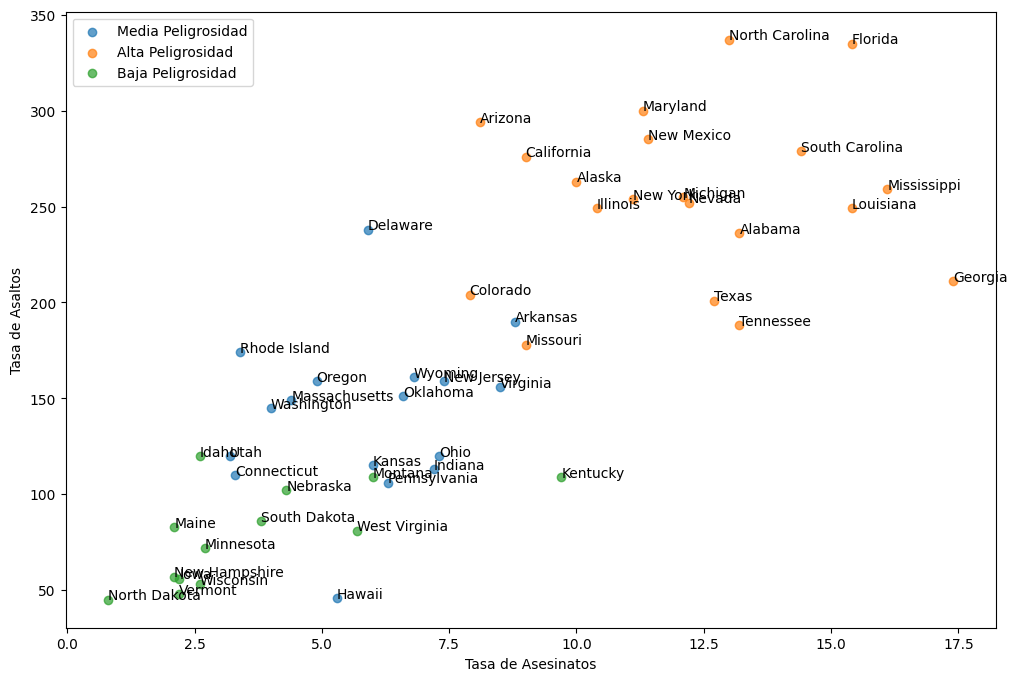

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# seleccionar columnas relevantes para el clustering
caracteristicas = datos[['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']]


# elegimos el número óptimo de clusters según la curva de codo
k_optimo = 3
kmeans_optimo = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
etiquetas_optimas = kmeans_optimo.fit_predict(caracteristicas_normalizadas)

# etiquetas al dataFrame original
datos['Cluster'] = etiquetas_optimas

# definimos nombres de categorías
nombres_categorias = {0: 'Media Peligrosidad', 1: 'Alta Peligrosidad', 2: 'Baja Peligrosidad'}

# gráfico con nombres de estados
plt.figure(figsize=(12, 8))

for categoria, nombre in nombres_categorias.items():
    subset = datos[datos['Cluster'] == categoria]
    plt.scatter(subset['Asesinatos'], subset['Asaltos'], label=nombre, alpha=0.7)

# agrega nombres de estados al gráfico
for i in range(len(datos)):
    plt.text(datos['Asesinatos'][i], datos['Asaltos'][i], datos['Estado'][i])

plt.xlabel('Tasa de Asesinatos')
plt.ylabel('Tasa de Asaltos')
plt.legend()
plt.show()

tambien hicimos esta elección de datos que se basa en que la mayor concentración de población en áreas urbanas y una alta tasa de violaciones podrían indicar una zona de mayor peligrosidad. La interpretación de los resultados puede ayudar a identificar patrones en los datos y entender cómo se agrupan los estados en términos de peligrosidad


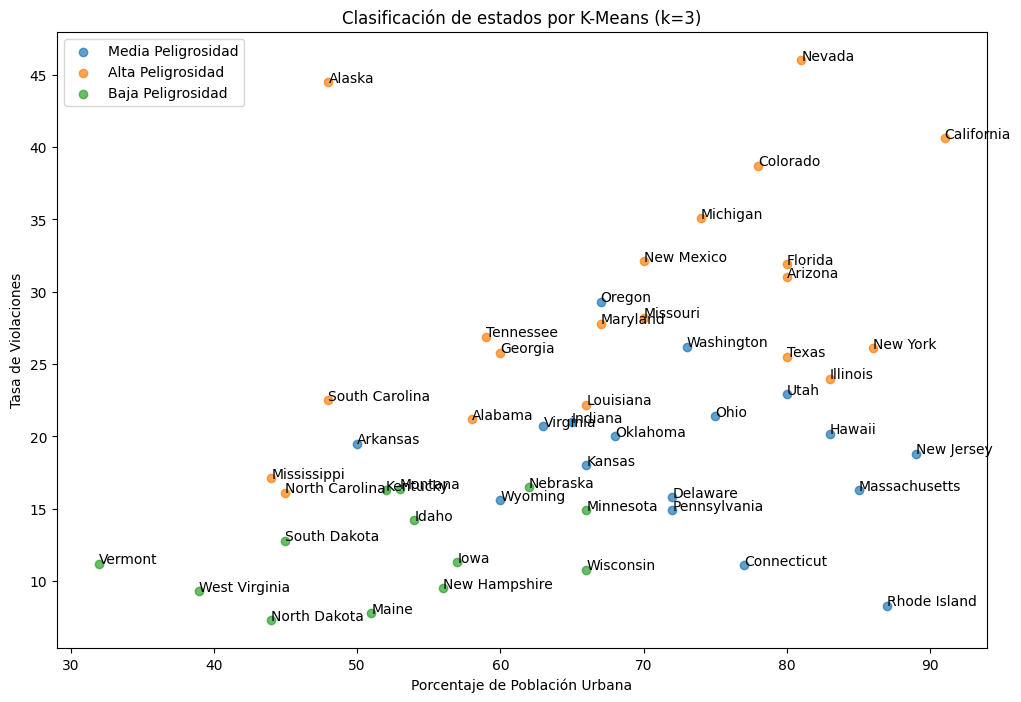

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#  columnas relevantes para el clustering
caracteristicas = datos[['Poblacion Urbana', 'Violaciones']]

k_optimo = 3
kmeans_optimo = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
etiquetas_optimas = kmeans_optimo.fit_predict(caracteristicas_normalizadas)

#etiquetas al DataFrame original
datos['Cluster'] = etiquetas_optimas

# Definir nombres de categorías
nombres_categorias = {0: 'Media Peligrosidad', 1: 'Alta Peligrosidad', 2: 'Baja Peligrosidad'}

#gráfico de dispersión con nombres de estados
plt.figure(figsize=(12, 8))

for categoria, nombre in nombres_categorias.items():
    subset = datos[datos['Cluster'] == categoria]
    plt.scatter(subset['Poblacion Urbana'], subset['Violaciones'], label=nombre, alpha=0.7)

#nombres de estados al gráfico
for i in range(len(datos)):
    plt.text(datos['Poblacion Urbana'][i], datos['Violaciones'][i], datos['Estado'][i])


plt.title(f'Clasificación de estados por K-Means (k={k_optimo})')
plt.xlabel('Porcentaje de Población Urbana')
plt.ylabel('Tasa de Violaciones')
plt.legend()
plt.show()